In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the Wine Quality dataset
wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

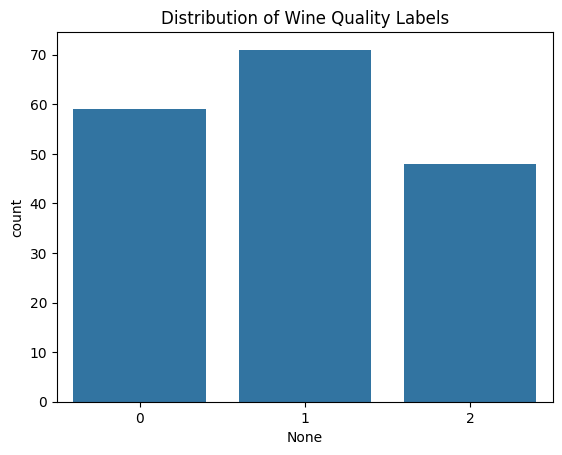

In [4]:
# Inspect data types, dimensions, and missing values
print(X.info())
print(X.describe())
print(y.value_counts())

# Check for class imbalance
sns.countplot(x=y)
plt.title('Distribution of Wine Quality Labels')
plt.show()

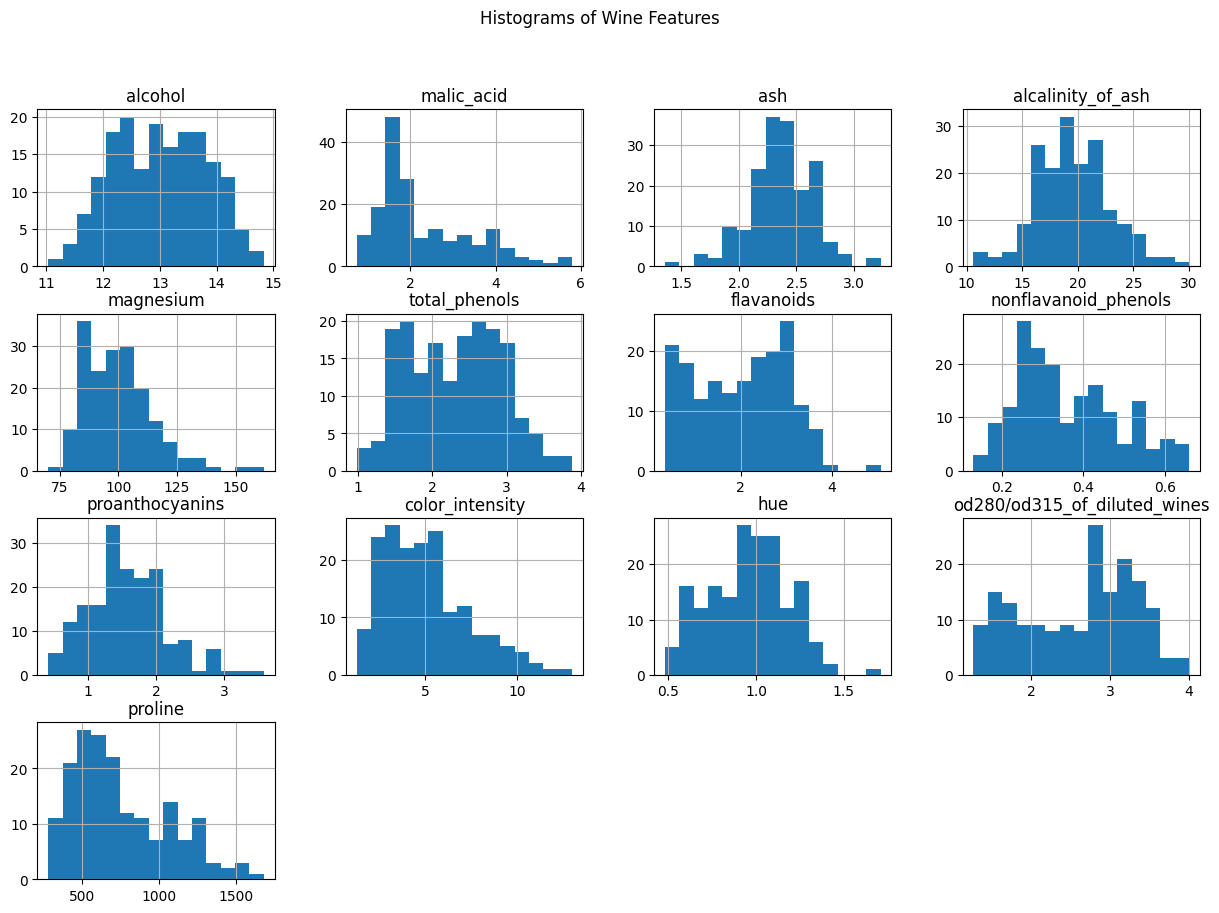

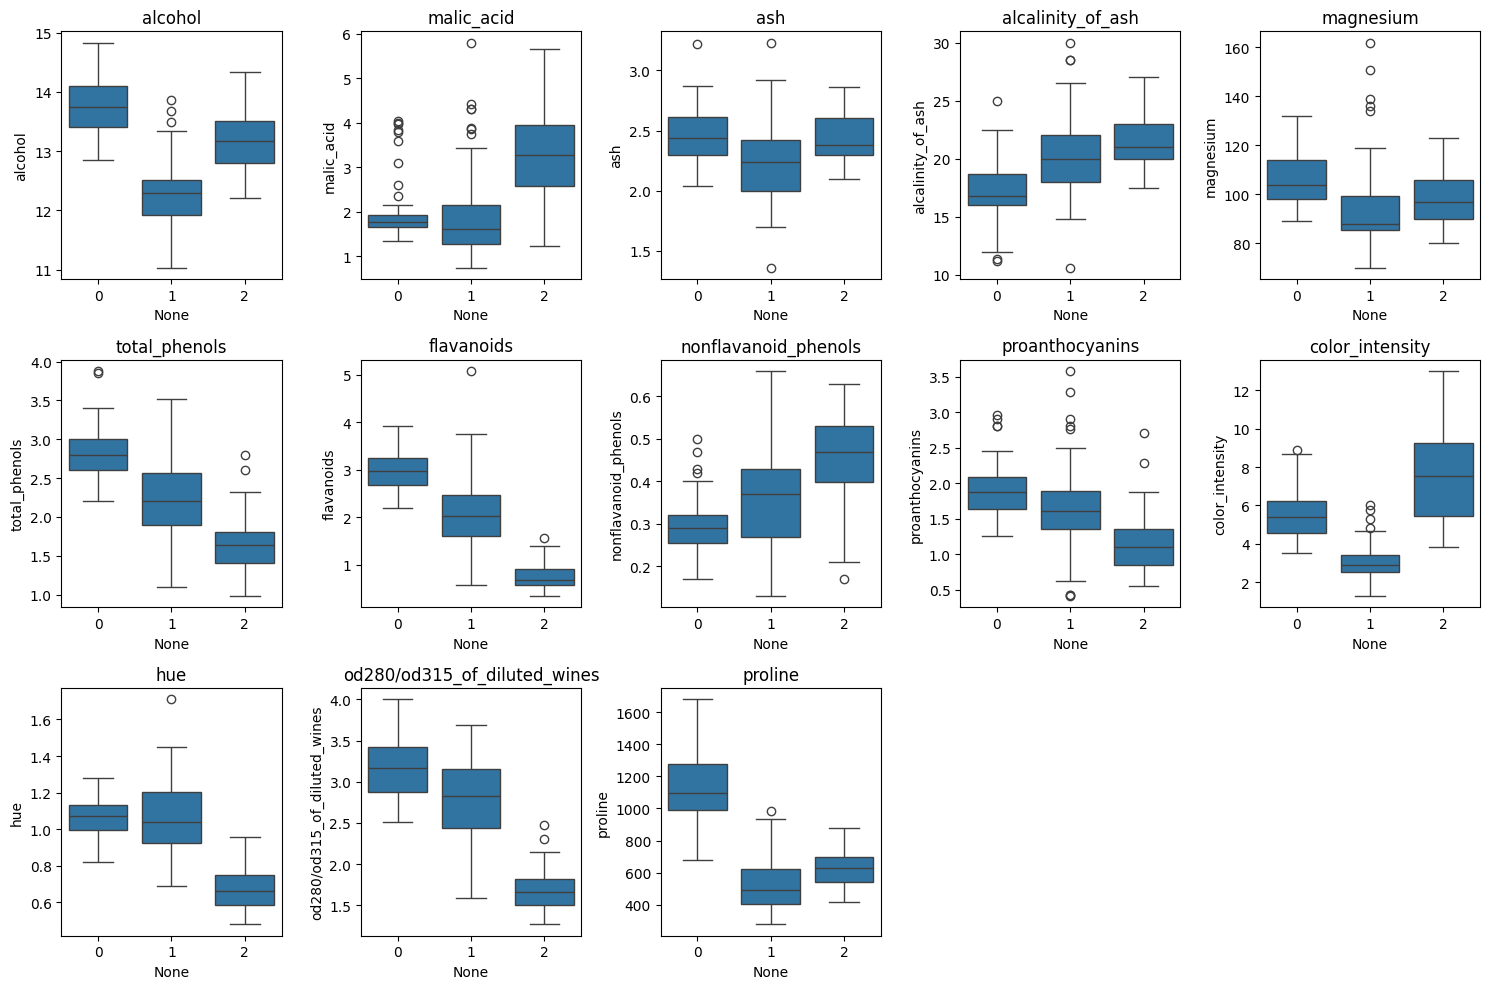

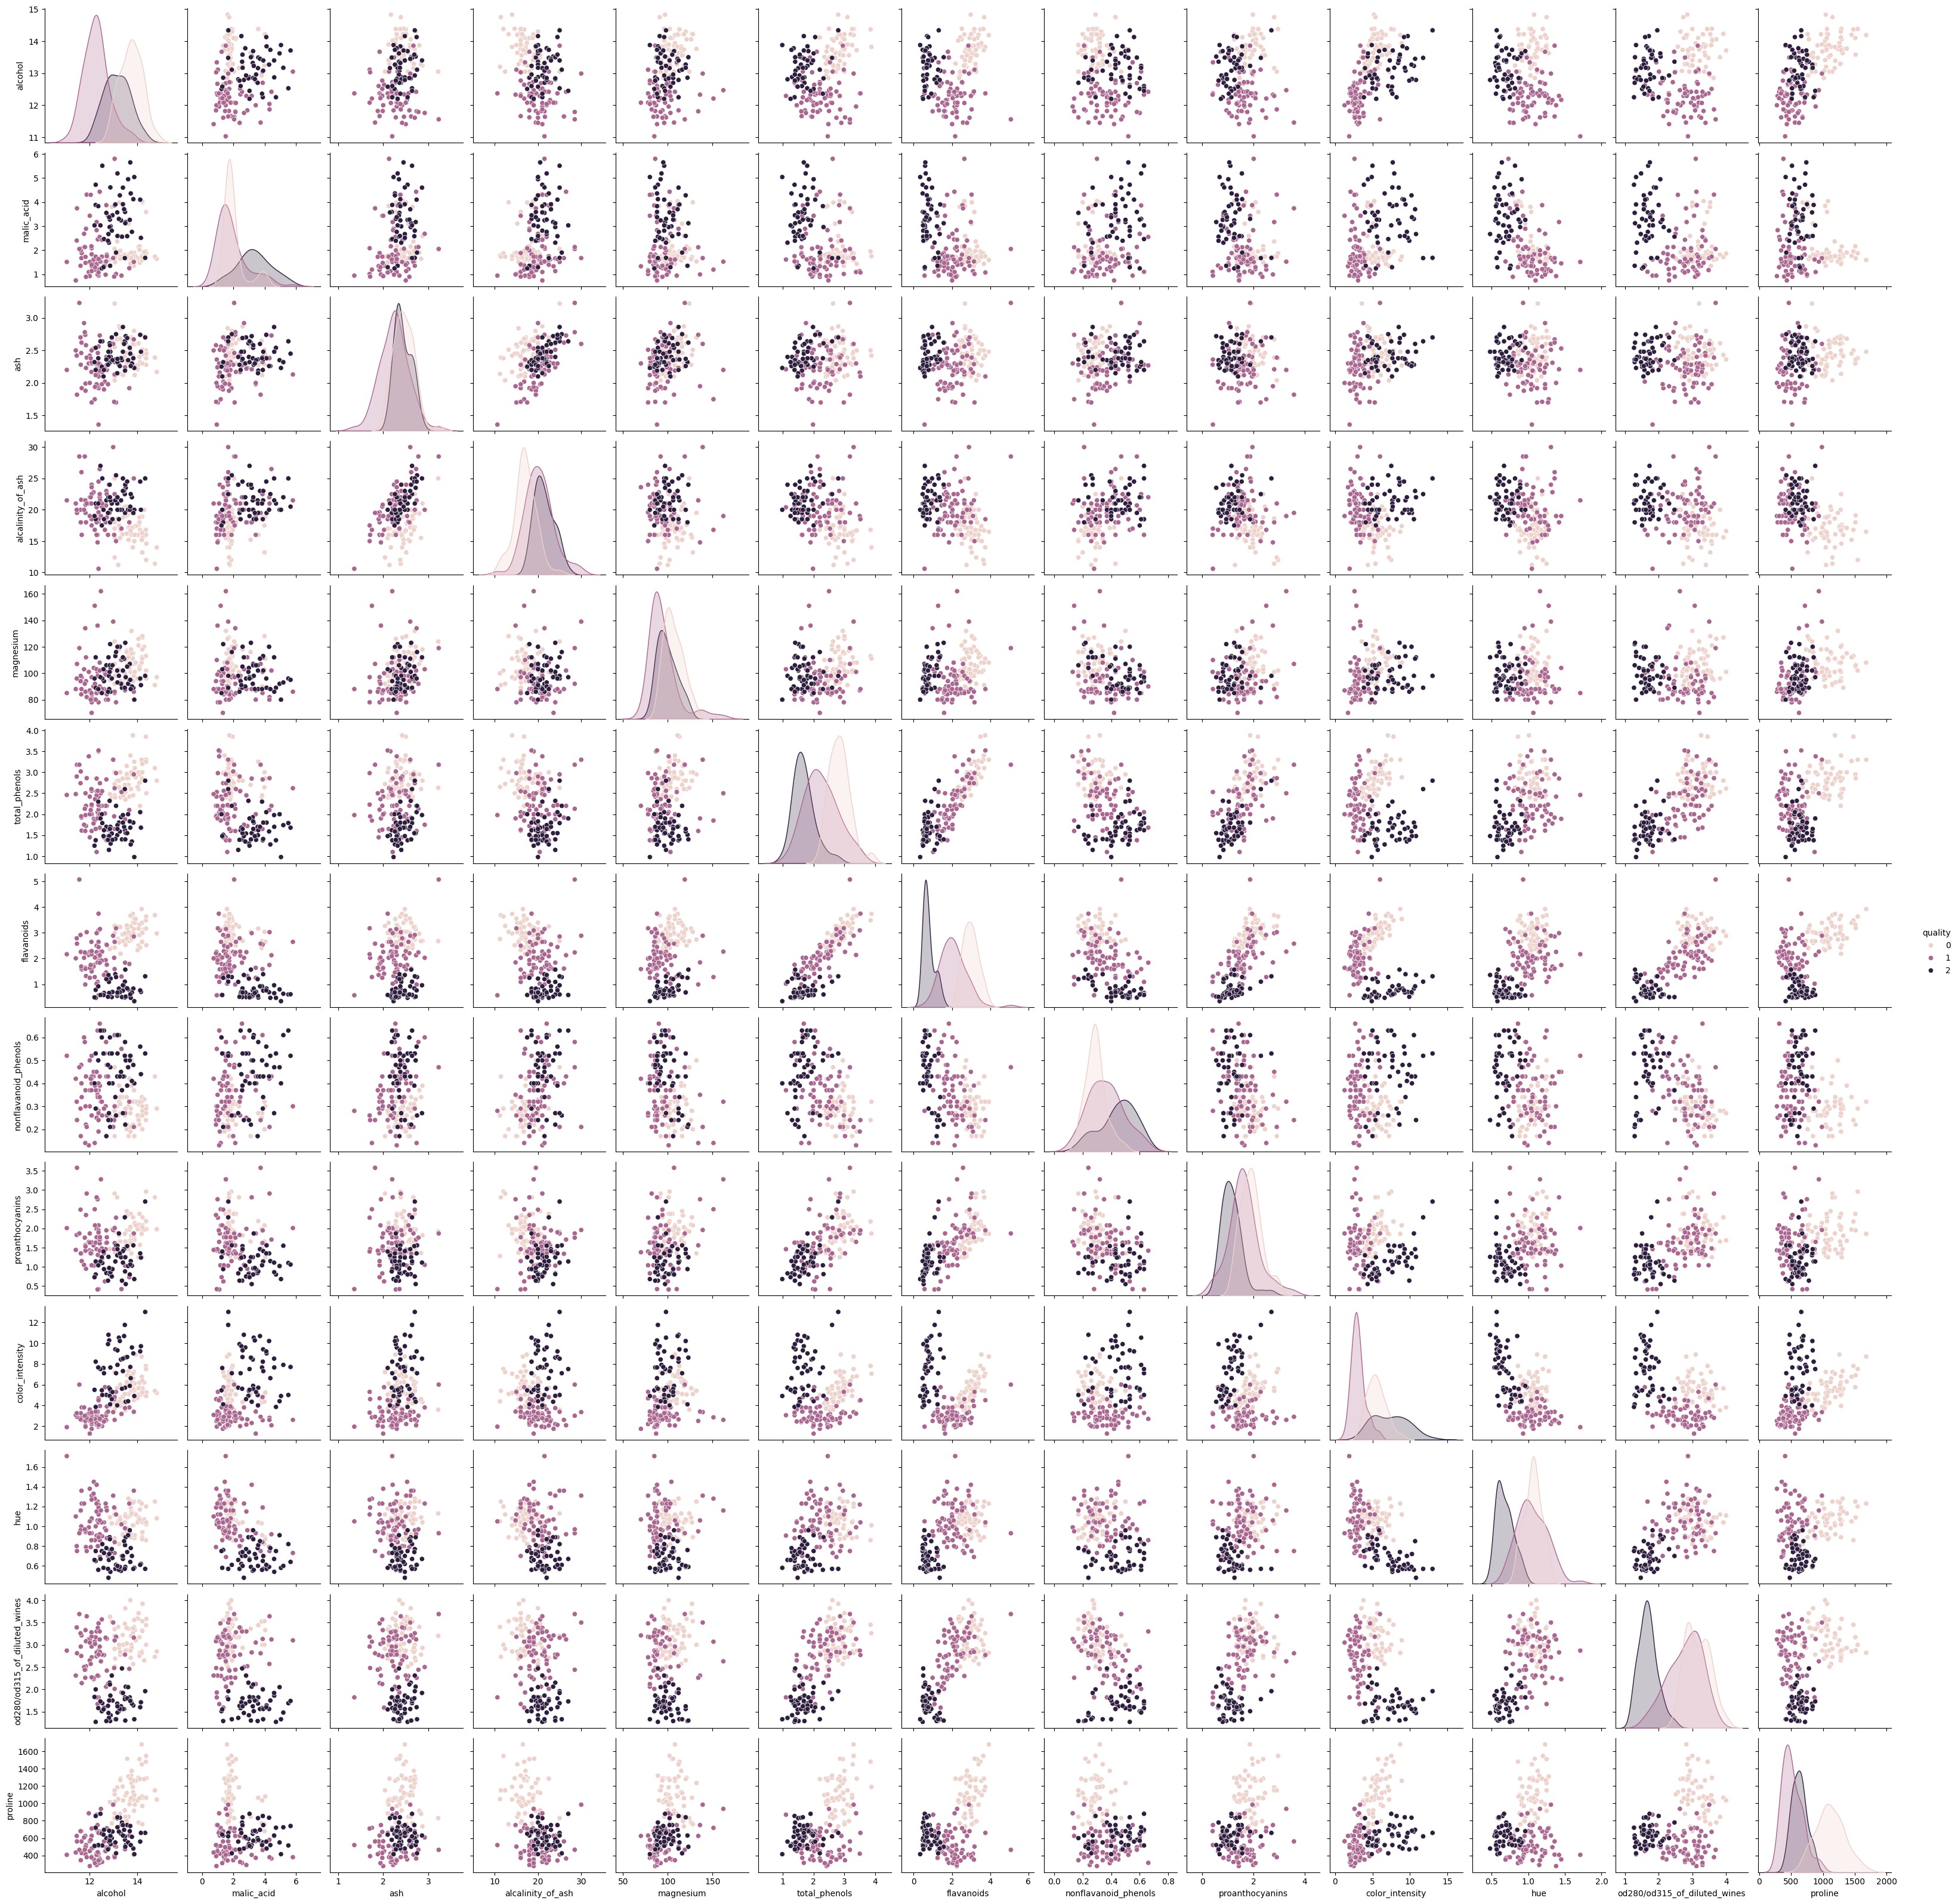

In [5]:
# Visualize individual features
X.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Wine Features')
plt.show()

# Box plots for individual features
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=X[col], x=y)
    plt.title(col)
plt.tight_layout()
plt.show()

# Pair plots
sns.pairplot(pd.concat([X, y.rename('quality')], axis=1), hue='quality')
plt.show()

In [6]:
# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# Model Selection and Implementation
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"Model: {name}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0  0]
 [ 0 10  1]
 [ 0  0  6]]
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.79      1.00      0.88        11
           2       1.00      0.83      0.91         6

    accuracy                           0.89        27
   macro avg       0.93      0.88      0.89        27
weighted avg       0.91      0.89      0.89        27

[[ 8  2  0]
 [ 0 11  0]
 [ 0  1  5]]
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.91      1.00 

In [8]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
y_pred_best = best_model.predict(X_val)
print(classification_report(y_val, y_pred_best))
print(confusion_matrix(y_val, y_pred_best))

Best parameters: {'max_depth': None, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.85      1.00      0.92        11
           2       1.00      0.83      0.91         6

    accuracy                           0.93        27
   macro avg       0.95      0.91      0.92        27
weighted avg       0.94      0.93      0.93        27

[[ 9  1  0]
 [ 0 11  0]
 [ 0  1  5]]


In [9]:
# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
print("Final Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Final Model Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0  8]]


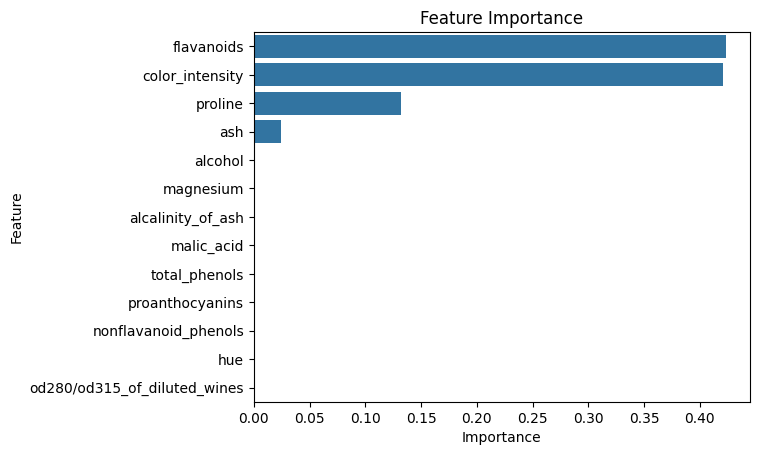

In [10]:
# Feature importance for Decision Tree
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()